# Task 5 - Bifurcation in crowd dynamics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import helpers.sir as sir

## 1. Simulate the S, I, R numbers for a given parametrization

### 1.1 Specify Parameters

In [3]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end - t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol = 1e-8
atol = 1e-8

# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.01  # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10  # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", sir.R0(beta, d, nu, mu1))
print("Globally asymptotically stable if beta <=d+nu+mu0. This is", beta <= d + nu + mu0)

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


### 1.2 Run the simulation

In [4]:
# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199, 0.1, 8), size=(3,))

time = np.linspace(t_0, t_end, NT)
sol = solve_ivp(
    sir.model,
    t_span=[time[0], time[-1]],
    y0=SIM0,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method="LSODA",
    rtol=rtol,
    atol=atol,
)

### 1.3 Show plots

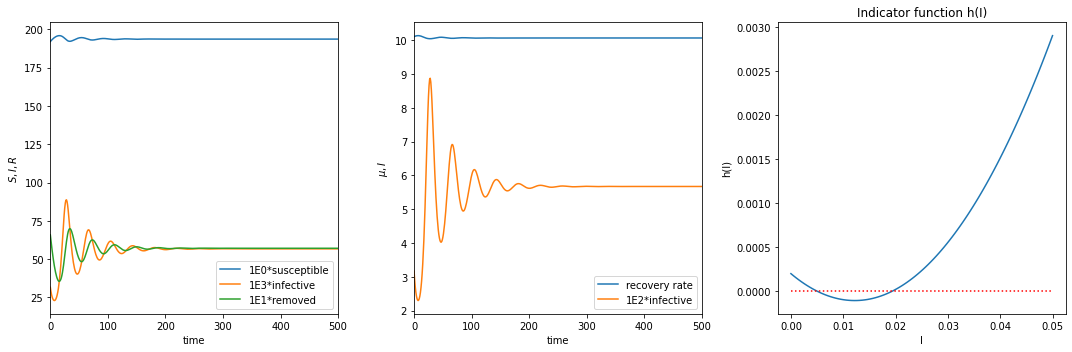

In [5]:
# TODO do these osciallations make sense? Do we need to adjust parameters first?
# TODO add titles to missing ones
# TODO 3rd plot add legend
# TODO add units to legend?
# TODO add grid?

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(sol.t, sol.y[0] - 0 * sol.y[0][0], label="1E0*susceptible")
ax[0].plot(sol.t, 1e3 * sol.y[1] - 0 * sol.y[1][0], label="1E3*infective")
ax[0].plot(sol.t, 1e1 * sol.y[2] - 0 * sol.y[2][0], label="1E1*removed")
ax[0].set_xlim([0, 500])
ax[0].legend()
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, sir.mu(b, sol.y[1], mu0, mu1), label="recovery rate")
ax[1].plot(sol.t, 1e2 * sol.y[1], label="1E2*infective")
ax[1].set_xlim([0, 500])
ax[1].legend()
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.0, 0.05, 100)
ax[2].plot(I_h, sir.h(I_h, mu0, mu1, beta, A, d, nu, b))
ax[2].plot(I_h, 0 * I_h, "r:")
# ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

## 2. Visualize single trajectories

### 2.1 Specify parameters

In [28]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end - t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol = 1e-8
atol = 1e-8

# SIR model parameters
beta = 11.5
A = 20
d = 0.1
nu = 1
b = 0.022 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10  # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", sir.R0(beta, d, nu, mu1))
print("Globally asymptotically stable if beta <=d+nu+mu0. This is", beta <= d + nu + mu0)

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


### 2.2 Run simulation and plot results

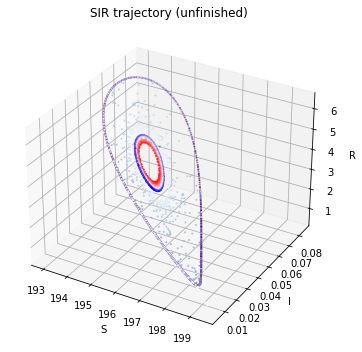

In [39]:
cmap = ["BuPu", "Purples", "bwr"][1]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")

time = np.linspace(t_0, 15000, NT)


SIM0 = [195.7, 0.03, 3.92]  # what happens with this initial condition when b=0.022?
sol = solve_ivp(
    sir.model,
    t_span=[time[0], time[-1]],
    y0=SIM0,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method="DOP853",
    rtol=rtol,
    atol=atol,
)
#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='BuPu')



SIM0 = [193, 0.08, 6.21]  # what happens with this initial condition when b=0.022?
sol = solve_ivp(
    sir.model,
    t_span=[time[0], time[-1]],
    y0=SIM0,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method="DOP853",
    rtol=rtol,
    atol=atol,
)
# TODO to see something remove cmap (but think about why it was added in the first place)
# TODO better plot than scatter to see connections?
# TODO fix cmap
# TODO colour = time currently no effect?
#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'b-');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='Purples')


# TODO what is this about?
SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(
    sir.model,
    t_span=[time[0],time[-1]],
    y0=SIM0,
    t_eval=time,
    args=(mu0, mu1, beta, A, d, nu, b),
    method='DOP853', rtol=rtol,
    atol=atol)
#ax.plot(sol.y[0], sol.y[1], sol.y[2], 'g-');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');


ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")

# TODO find out what this "unfinished" is about
ax.set_title("SIR trajectory (unfinished)")
fig.tight_layout()

### Subtask 3
(see page 1675 of [5])

### Subtask 4
(see page 1675 of [5])
Kind of bifurcation: Supercritical Hopf bifurcation
Normal Norm:

Happens for b = 0.022

### Subtask 5
Reproduction Rate:
$R_0 = \frac{\beta}{\delta + v + \mu_1}$

$\beta$: "average number of adequate contacts per unit time with infectious individuals" [exercise sheet]

$\delta$: "per capita natural death rate of the population"[Shan, Zhu]

$v$: "per capita disease-induced death rate"[Shan, Zhu]

$\mu_1$: maximum recovery rate

The reproduction rate §R_0§ depends on the number of infectious contacts, the natural death rate, the disease-related death rate and the maximum recovery rate.
A small average number of contacts with infectious persons results in a small $R_0$-value which will eventually eliminates the disease if it stays below $R_0 = 1$. The number of infected people will tend to 0.
This is why it is particularly important to reduce one's contacts in order to reduce the number of contacts with infectious persons and therefore support an elimination of a disease.
With a higher number of contacts with infectious persons, $R_0$ might exceed the threshold of 1 and the disease won't be stopped. The number of infected people will increase.
While $\delta$ and $v$ are constants that cannot be changed in a short period of time, the other important factor is the maximum recovery rate that is based on the number of available beds in hospitals. Here, a high number of beds lead to a smaller $R_0$. If only a few beds are available, $R_0$ will be higher.


### Subtask 6

If $E_0$ is an attracting node, it means that the system will stay in this disease free state for $R_0 < 1$.
Values close to $E_0$ will lead to a disease free equilibrium, meaning that the disease will not spread among the people and eventually be eliminated.